#Insideairbnb

David Alberto Padrón Sánchez A01663806

In [10]:
pip install polars

In [11]:
import polars as pol
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
from google.colab import drive
drive.mount('/content/drive')
data=pol.read_csv('/content/drive/MyDrive/Semestre7/listings.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##Conocemos los datos

In [13]:
data.count()

id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,…,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,availability_eoy,number_of_reviews_ly,estimated_occupancy_l365d,estimated_revenue_l365d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,…,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32
26067,26067,26067,26067,26067,26067,25300,14391,26067,26067,26067,26062,26062,20587,26062,26062,26062,26062,24724,26062,26062,13875,26062,26062,26067,26062,26062,14391,26067,0,26067,26067,26067,26067,26067,22062,26040,…,26067,26067,26067,26067,26067,26067,26067,0,25076,26067,26067,26067,26067,26067,26067,26067,26067,26067,26067,26067,22068,22806,22806,22806,22805,22805,22805,22805,22805,22805,0,26067,26067,26067,26067,26067,22806


In [14]:
data.head()

id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,…,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,availability_eoy,number_of_reviews_ly,estimated_occupancy_l365d,estimated_revenue_l365d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
i64,str,i64,str,str,str,str,str,str,i64,str,str,str,str,str,str,str,str,str,str,str,str,i64,i64,str,str,str,str,str,str,f64,f64,str,str,i64,f64,str,…,i64,i64,i64,i64,i64,f64,f64,str,str,i64,i64,i64,i64,str,i64,i64,i64,i64,i64,i64,i64,str,str,f64,f64,f64,f64,f64,f64,f64,str,str,i64,i64,i64,i64,f64
35797,"""https://www.airbnb.com/rooms/3…",20250319150644,"""2025-03-21""","""city scrape""","""Villa Dante""","""Dentro de Villa un estudio de …","""Santa Fe Shopping Mall, Interl…","""https://a0.muscache.com/pictur…",153786,"""https://www.airbnb.com/users/s…","""Dici""","""2010-06-28""","""Mexico City, Mexico""","""Master in visual arts, film ph…","""N/A""","""N/A""","""N/A""","""f""","""https://a0.muscache.com/im/pic…","""https://a0.muscache.com/im/pic…",null,1,1,"""['email', 'phone', 'work_email…","""t""","""t""","""Mexico City, D.f., Mexico""","""Cuajimalpa de Morelos""",null,19.38283,-99.27178,"""Entire villa""","""Entire home/apt""",2,1.0,"""1 bath""",…,7,1,1,7,7,1.0,7.0,null,"""t""",28,58,88,363,"""2025-03-21""",0,0,0,284,0,0,0,null,null,null,null,null,null,null,null,null,null,"""f""",1,1,0,0,null
44616,"""https://www.airbnb.com/rooms/4…",20250319150644,"""2025-03-20""","""previous scrape""","""Condesa Haus""","""A new concept of hosting in me…",null,"""https://a0.muscache.com/pictur…",196253,"""https://www.airbnb.com/users/s…","""Fernando""","""2010-08-09""","""Mexico City, Mexico""","""Condesa Haus Rentals offers i…","""within a few hours""","""100%""","""90%""","""f""","""https://a0.muscache.com/im/use…","""https://a0.muscache.com/im/use…","""Condesa""",13,13,"""['email', 'phone', 'work_email…","""t""","""t""",null,"""Cuauhtémoc""",null,19.41162,-99.17794,"""Entire home""","""Entire home/apt""",14,null,"""5.5 baths""",…,365,1,1,365,365,1.0,365.0,null,"""t""",29,59,89,364,"""2025-03-20""",65,1,0,286,0,6,null,"""2011-11-09""","""2025-01-01""",4.59,4.56,4.7,4.87,4.78,4.98,4.47,null,"""f""",9,4,2,0,0.4
56074,"""https://www.airbnb.com/rooms/5…",20250319150644,"""2025-03-20""","""city scrape""","""Great space in historical San …","""This great apartment is locate…","""Very traditional neighborhood …","""https://a0.muscache.com/pictur…",265650,"""https://www.airbnb.com/users/s…","""Maris""","""2010-10-19""","""Mexico City, Mexico""","""I am a University Professor no…","""within a day""","""88%""","""100%""","""f""","""https://a0.muscache.com/im/use…","""https://a0.muscache.com/im/use…","""San Rafael""",1,5,"""['email', 'phone']""","""t""","""t""","""Mexico City, DF, Mexico""","""Cuauhtémoc""",null,19.43977,-99.15605,"""Entire condo""","""Entire home/apt""",2,1.0,"""1 bath""",…,250,15,15,25

In [15]:
data["price"].head()

price
str
"""$3,982.00"""
null
"""$585.00"""
null
"""$1,015.00"""
null
"""$3,982.00"""
"""$327.00"""
"""$605.00"""


#Price

Convertimos Price de string a float para sacar mean

In [34]:
data = data.with_columns(pol.col("price").str.replace_all("[\$,]", "").cast(pol.Float64).alias("price"))

<>:1: SyntaxWarning: invalid escape sequence '\$'
<>:1: SyntaxWarning: invalid escape sequence '\$'
/tmp/ipython-input-3137432740.py:1: SyntaxWarning: invalid escape sequence '\$'
  data = data.with_columns(pol.col("price").str.replace_all("[\$,]", "").cast(pol.Float64).alias("price"))


In [35]:
data["price"].head()

price
f64
3982.0
585.0
1015.0
3982.0
327.0
605.0
353.0
790.0
1300.0


Quitamos nulos

In [36]:
data = data.filter(pol.col("price").is_not_null())
display(data["price"].head())

price
f64
3982.0
585.0
1015.0
3982.0
327.0
605.0
353.0
790.0
1300.0


#Mean Price


In [39]:
print(f'{data["price"].mean():.2f}')

1665.01


#Room Type

In [32]:
data["room_type"].head()

room_type
str
"""Entire home/apt"""
"""Entire home/apt"""
"""Entire home/apt"""
"""Entire home/apt"""
"""Private room"""
"""Entire home/apt"""
"""Private room"""
"""Private room"""
"""Private room"""


#Room Type más común

In [41]:
room_type_counts = data["room_type"].value_counts().sort("count", descending=True)
display(room_type_counts[0:11])

room_type,count
str,u32
"""Entire home/apt""",14843
"""Private room""",6995
"""Shared room""",169
"""Hotel room""",61


Por lo que el Room Type más común es:

In [42]:
display(room_type_counts[0])

room_type,count
str,u32
"""Entire home/apt""",14843


#Neighbourhood Cleansed

In [21]:
data["neighbourhood_cleansed"].head()

neighbourhood_cleansed
str
"""Cuajimalpa de Morelos"""
"""Cuauhtémoc"""
"""Coyoacán"""
"""Miguel Hidalgo"""
"""Benito Juárez"""
"""Cuauhtémoc"""
"""Coyoacán"""
"""Cuauhtémoc"""
"""Coyoacán"""


#10 Alcaldías con más alojamientos

In [22]:
neighborhood_counts = data["neighbourhood_cleansed"].value_counts().sort("count", descending=True)
display(neighborhood_counts[1:11])

neighbourhood_cleansed,count
str,u32
"""Miguel Hidalgo""",3764
"""Benito Juárez""",2482
"""Coyoacán""",1362
"""Álvaro Obregón""",799
"""Venustiano Carranza""",752
"""Tlalpan""",582
"""Gustavo A. Madero""",424
"""Iztacalco""",389
"""Azcapotzalco""",317


#10 Personas con más alojamientos

In [24]:
host_counts = data["host_name"].value_counts().sort("count", descending=True)
display(host_counts[1:11])

host_name,count
str,u32
"""Alejandro""",244
"""Juan""",241
"""Blueground""",225
"""Raul""",225
"""Luis""",214
"""Mr. W""",201
"""Carlos""",175
"""Eduardo""",173
"""Jorge""",172


#Histograma de distribución de precios

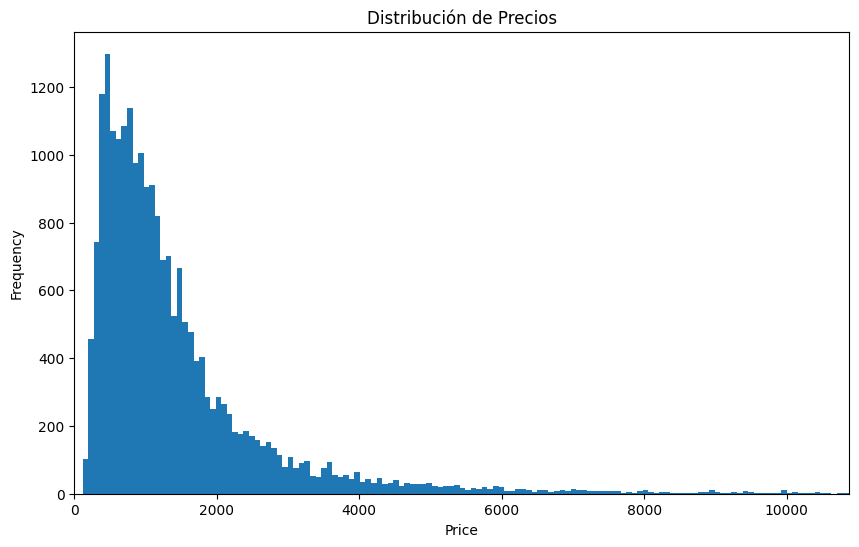

In [61]:
import numpy as np
import matplotlib.pyplot as plt

prices = (data.select("price").to_pandas()["price"].astype("float64").dropna())
#Debido a los outliers calculo el percentil para un límite visual que no afecte en mi gráfico
p99 = np.percentile(prices, 99)

plt.figure(figsize=(10, 6))
plt.hist(prices, bins="fd")
plt.xlim(0, p99)
plt.title("Distribución de Precios")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

#Gráfica de barras Tipos de Alojamiento vs Cantidad

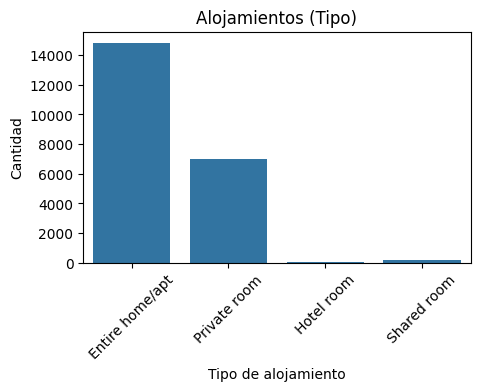

In [45]:
plt.figure(figsize=(5, 3))
df = data.to_pandas()
sns.countplot(data=df, x="room_type")
plt.title("Alojamientos (Tipo)")
plt.xlabel("Tipo de alojamiento")
plt.ylabel("Cantidad")
plt.xticks(rotation=45)
plt.show()

#Gráfica de barras horizontal Top #10 Alcaldías

<Figure size 1000x600 with 0 Axes>

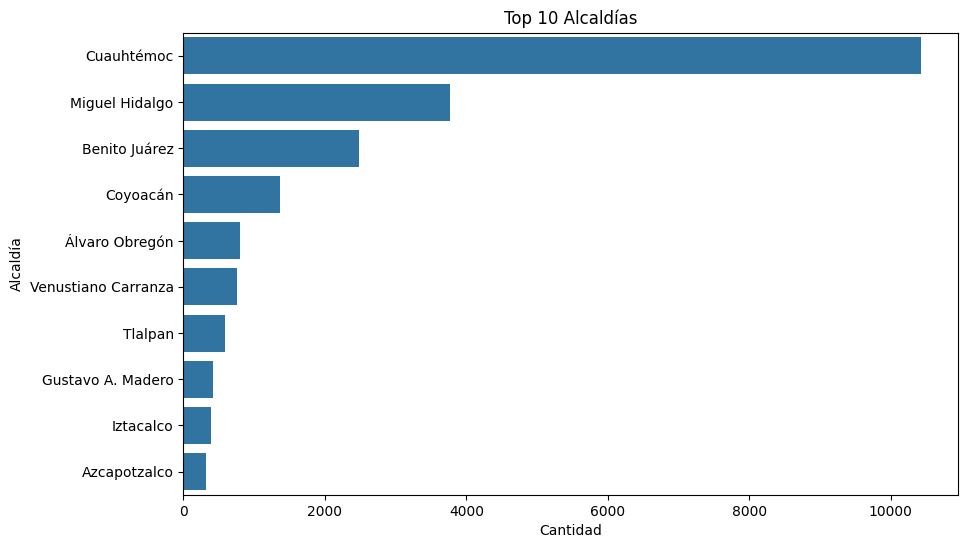

In [62]:
plt.figure(figsize=(10, 6))
df = data.to_pandas()
df_top10 = df["neighbourhood_cleansed"].value_counts().head(10).reset_index()
df_top10.columns = ["alcaldia", "cantidad"]

plt.figure(figsize=(10, 6))
sns.barplot(data=df_top10, y="alcaldia", x="cantidad")
plt.title("Top 10 Alcaldías")
plt.xlabel("Cantidad")
plt.ylabel("Alcaldía")
plt.show()

#Distribución geográfica de precios

In [68]:
!pip -q install geopandas contextily pyproj shapely


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.3/22.3 MB 79.9 MB/s eta 0:00:00


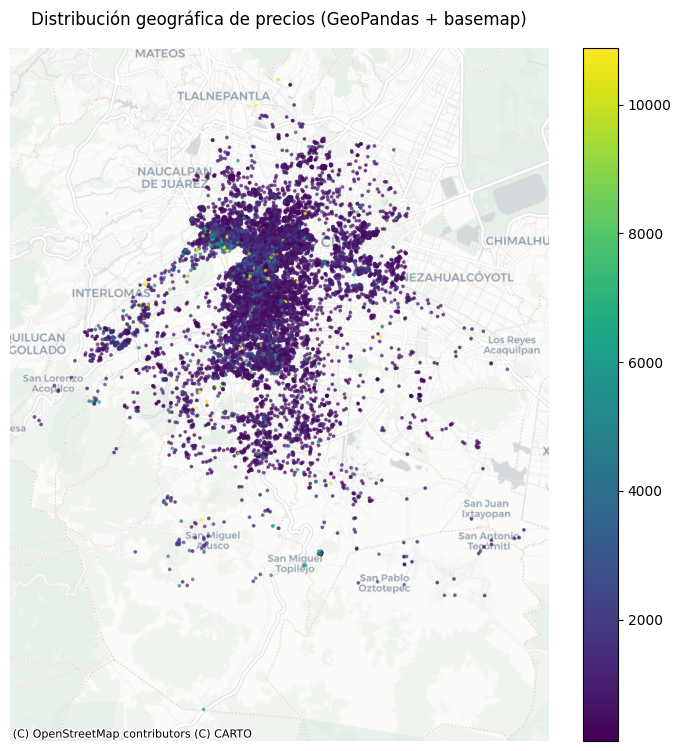

In [77]:
import geopandas as gpd
from shapely.geometry import Point
import contextily as ctx

gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df["longitude"], df["latitude"]),crs="EPSG:4326")

gdf_3857 = gdf.to_crs(epsg=3857)
prices_for_color = gdf_3857["price"].clip(upper=p99)

fig, ax = plt.subplots(figsize=(9, 9))
gdf_3857.plot(ax=ax, column=prices_for_color, markersize=3, alpha=0.6, cmap="viridis", legend=True)
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)
ax.set_axis_off()
ax.set_title("Distribución geográfica de precios")
plt.show()
